In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
csv_2016 = pd.read_csv('2016/Week 8 Feedback (2016, incomplete) - results.csv')
csv_2017 = pd.read_csv('2017/Student Feedback Surveys-Superview.csv')

In [116]:
def clean_week(input):
    return int(input[-1])

def clean_rating(input):
    try:
        rating = int(input)
        return rating
    except ValueError:
        return False

csv_2017.columns = ['ID', 'Location', 'Track', 'Week', 'Rating', 'Pacing']
csv_2017_cleaned = csv_2017.drop(columns=['Pacing'])
csv_2017_cleaned['Week'] = csv_2017['Week'].apply(clean_week)
csv_2017_cleaned['Rating'] = csv_2017['Rating'].apply(clean_rating)

In [133]:
csv_2017_cleaned.head(10)

ID       Location           Track  Week Rating
0  134  San Francisco  Apps, Explorer     1      3
1   36    Los Angeles            Apps     1      4
2  117  San Francisco           Games     1      4
3  253            NaN             NaN     2      4
4  350  New York City  Apps, Explorer     1      4
5   23   Redwood City            Apps     1      5
6   28    Los Angeles            Apps     7      5
7   65  San Francisco            Apps     1      5
8  101    Santa Clara            Apps     1      5
9  124    Santa Clara            Apps     1      5

## Mean Ratings Per Week via Lineplot

Below, we look for the average rating per week.

In [236]:
def find_means(data):
    data = []
    for i in range(1, 9):
        data.append(csv_2017_cleaned[csv_2017_cleaned["Week"] == i]["Rating"].mean())
    return np.array(data)

ratings = csv_2017_cleaned['Rating']
weeks = csv_2017_cleaned['Week']

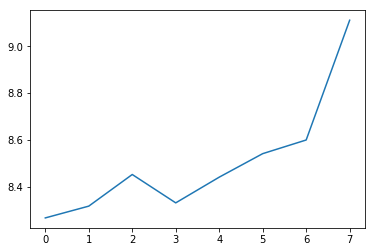

In [237]:
plt.plot(find_means(csv_2017_cleaned))

## Alt: Mean Ratings Per Week via Linear Regression

Another route is using the regplot. With x-estimator, we can see the mean and standard deviation per week!

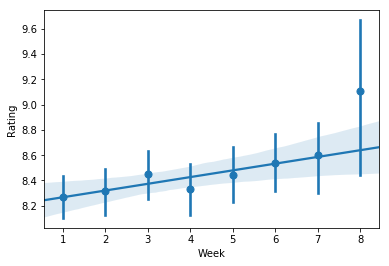

In [218]:
ratings = csv_2017_cleaned['Rating']
weeks = csv_2017_cleaned['Week']


ax_rating = sns.regplot(x='Week', y='Rating', data=csv_2017_cleaned, x_estimator=np.mean)

In [235]:
print(csv_2017_cleaned[csv_2017_cleaned["Week"] == 8]["Rating"].describe())
print(csv_2017_cleaned[csv_2017_cleaned["Week"] == 1]["Rating"].describe())

count      9
unique     4
top       10
freq       4
Name: Rating, dtype: int64
count     288
unique      8
top         8
freq       91
Name: Rating, dtype: int64


## NPS scores
### Converting NPS Scores

In [238]:
def nps_convert(input):
    if(input <= 6):
        return -1
    elif(input <= 8):
        return 0
    else:
        return 1

csv_2017_cleaned['NPS'] = csv_2017_cleaned['Rating'].apply(nps_convert)

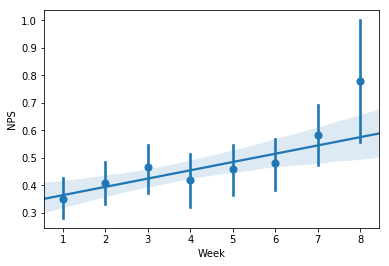

In [239]:
ax_nps = sns.regplot(x='Week', y='NPS', data=csv_2017_cleaned, x_estimator=np.mean)

In [ ]:
df_results = pd.concat([csv_2016_cleaned, csv_2017_cleaned], sort=True)

In [89]:
# pd.get_dummies(pd.Series(df_results['Rating']))
df_results

ID       Location Rating  \
0     00b836bda84e6bdbe780af97e249e59f       New York     10   
1     39dde6dc0e1e375845d756fc7e39fc5f  San Francisco     10   
2     5e56b9de91670b308cb98dd2848b8739       New York     10   
3     641081d05785b47a0f17448625da0d49      Sunnyvale      9   
4     c29bdd4f5678d78b450f4494e0f53c8c  San Francisco      3   
5     9030d8a662b39b519b2b685834413d66  San Francisco     10   
6     1c07190c7caa72bf6b59cea48e1a4a97  San Francisco      8   
7     27a63d6c24710feb52c0cfdef7e01175       New York      3   
8     b47b95f84547d8347119de1da5faa46d      Singapore      6   
9     828fafa477484f61d2ca5930fe99ad46       New York      9   
10    7d70f1e30217d867f3c0f961462d8ae8      Sunnyvale     10   
11    65bd071ab808290560e7d11c09f56796  San Francisco     10   
12    d66976d012b4c8a5c708f1a438605488  San Francisco      8   
13    9db748a8e0d5789cb3a5fcb27fc59083      Sunnyvale      8   
14    5ee2a5d8e87fd5790906f7b004963e14    Los Angeles      8   
15    9826290f1bf2fd4c105857e2af933ffe  San Francisco     10   
16    ea85e7c699751b5993776ef16db0b1d9      Sunnyvale      9   
17    58cb61ce774b116d87e3888d4c1babf1       New York     10   
18    a08ef61cfa87d1ba00c691de4a55f4c2      Singapore      7   
19    630fd265cdb8308b60b4b59351690f0a  San Francisco     10   
20    2f7303a7ac0943b341d02678b085688e  San Francisco     10   
21    785568c94d73aa0fad4493ee79fa3974      Sunnyvale     10   
22    fe02b118aea0ef15ccd06e6f7e6209f4       New York      4   
23    6e2c750a71613e3fd7d5f425320cc750  San Francisco      9   
24    522ff7a7546272c3c98eab026e8c098a      Sunnyvale     10   
25    80fce9f8822690ad581ff8d554e6f629      Sunnyvale      9   
26    e78c696358f9c59b0375884ab9217f70  San Francisco     10   
27    4885e461415138a403fb0408a8060094      Sunnyvale     10   
28    bb261d3e5b4fe2197f54f28c416948e1      Sunnyvale      7   
29    391157a49dc832edb535b3c6ee3dd6a0  San Francisco     10   
...                                ...            ...    ...   
1423                              1470  New York City     10   
1424                              1471  New York City      8   
1425                              1472  New York City      9   
1426                              1473  New York City     10   
1427                              1474  New York City      9   
1428                              1475  New York City      9   
1429                              1476  New York City      8   
1430                              1477  New York City     10   
1431                              1478  New York City     10   
1432                              1479  New York City      9   
1433                              1480  New York City      9   
1434                              1481  New York City     10   
1435                              1482  New York City      8   
1436                              1483  New York City      7   
1437                              1484  New York City      7   
1438                              1485  New York City      7   
1439                              1486  New York City      9   
1440                              1487  New York City      8   
1441                              1488  New York City      7   
1442                              1489  New York City     10   
1443                              1490  New York City     10   
1444                              1491  New York City      9   
1445                              1492  New York City      9   
1446                              1493  New York City      3   
1447                              1494  New York City     10   
1448                              1495  New York City     10   
1449                              1496  New York City      8   
1450                              1497  New York City     10   
1451                              1498  New York City      1   
1452                              1499  New York City      8   

                    Track  
0              summerApps  
1          